# Simulation of variance of OLS parameters
Recently, I've spend some time to understand what *variance* of parameters actually means. If I understand it correctly, the variance of an estimate refers to how much we expect our estimate ($\hat{\beta}$) to vary from the true population parameter ($\beta$). In OLS, two terms contribute to the variance estimate: the unexplained variance and the design variance. 

Unexplained variance, also referred to as $\hat{\sigma}^{2}$, is defined as:

\begin{align}
\hat{\sigma}^{2} = \frac{\sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}}{N - K}
\end{align}

The design variance, for any contrast $c$, is defined as:

\begin{align}
desvar = c(X'X)^{-1}c'
\end{align}

As such, the variance of any contrast of beta-parameter(s) is defined as:

\begin{align}
\mathrm{var}[c\beta] = \frac{\sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^{2}}{N - K} c(X'X)^{-1}c'
\end{align}

While mathematically, I understand *how* variance is computed. But it's conceptual meaning -- i.e. the expected squared deviation from the true population parameter -- is still a bit muddy for me. As such, I decided to simulate the process, which often helps me to understand statistical issues.

First, some imports.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's define an arbitrary *true* model of some dependent variable $y$. Let's assume the true function is:

\begin{align}
y = 10 + 5x
\end{align}

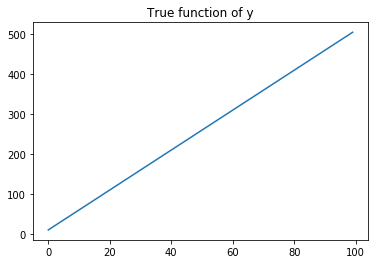

In [45]:
x = np.arange(100)
y = 10 + 5 * x
plt.plot(x, y)
plt.title("True function of y")
plt.show()

Let's now add some random gaussian noise ($\mu = 0, \sigma=1$) to our dependent variable and estimate the parameter of the intercept and $x$ using linear regression. We'll also calculate the variance of this estimate (using the contrast-vector `[1, 0]` for the intercept-parameter and `[0, 1]` for the $x$-parameter). We'll iterate this process 10,000 times and keep track of the parameter-estimates and their variance-estimates.

In [60]:
iters = 50000
betas = np.zeros((iters, 2))
vars = np.zeros((iters, 2))
c = np.array([[1, 0], [0, 1]])
X = np.hstack((np.ones((100, 1)), x[:, np.newaxis]))
    
for i in range(iters):
    y2 = y + np.random.normal(0, 1, 100) * 100
    betas[i, :] = np.linalg.lstsq(X, y2)[0]
    y_hat = X.dot(betas[-1, :])
    sigma_hat = np.sum((y_hat - y2) ** 2) / (X.shape[0] - X.shape[1])
    desvar = c.dot(np.linalg.pinv(X.T.dot(X))).dot(c.T)
    vars[i, :] = np.diag(sigma_hat * desvar)

Let's plot the histograms of the two parameter-estimates:

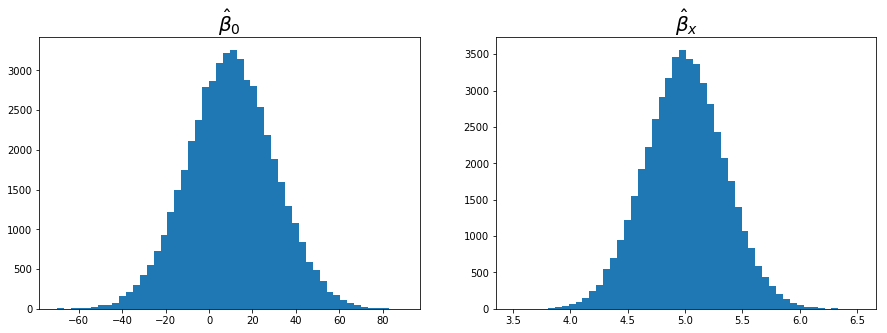

In [62]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(betas[:, 0], bins=50)
plt.title(r"$\hat{\beta}_{0}$", fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(betas[:, 1], bins=50)
plt.title(r"$\hat{\beta}_{x}$", fontsize=20)

plt.show()

Now, the central limit theorem (CTL) predicts that the mean of this distribution should approximate the true parameters (I think). Let's check that:

In [63]:
betas.mean(axis=0)

array([ 10.10447338,   4.99799692])

Now, let's calculate the variance of our parameter-estimates across the simulations:

In [64]:
betas.var(axis=0)

array([  3.94466169e+02,   1.19993340e-01])

This estimate from our simulation should then (I think) approximate the average variance estimate across simulations:

In [73]:
vars.mean(axis=0)

array([  3.90509682e+03,   1.18930922e+00])

... which seems indeed the case!

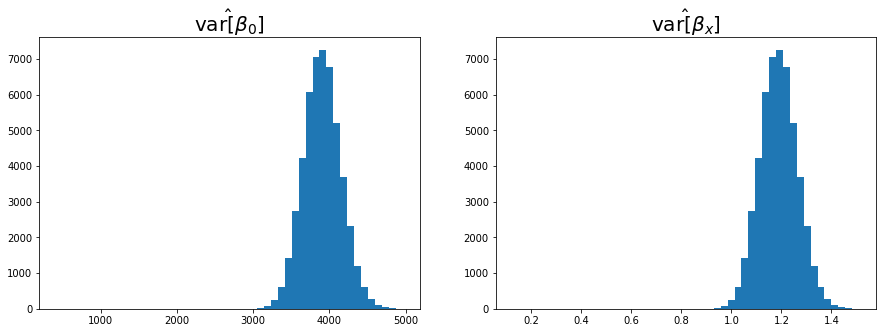

In [72]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(vars[:, 0], bins=50)
plt.title(r"$\hat{\mathrm{var}[\beta}_{0}]$", fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(vars[:, 1], bins=50)
plt.title(r"$\hat{\mathrm{var}[\beta}_{x}]$", fontsize=20)

plt.show()